In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/dataset/netflix_titles.csv')

Mounted at /content/drive


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df[['duration_int', 'duration_type']] = df['duration'].str.extract('(\d+)\s*(\w+)')
df['duration_int'] = pd.to_numeric(df['duration_int'])

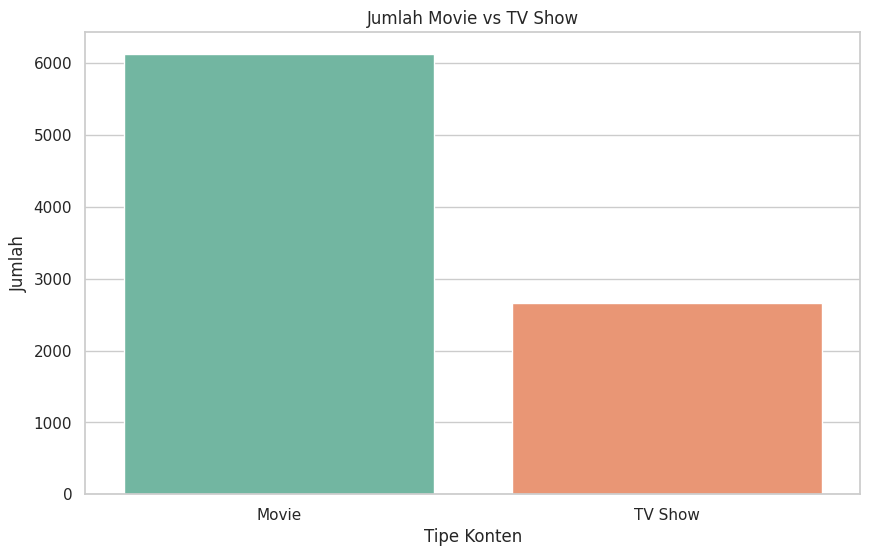

In [ ]:
sns.countplot(data=df, hue='type', x='type', palette='Set2', legend=False)
plt.title("Jumlah Movie vs TV Show")
plt.xlabel("Tipe Konten")
plt.ylabel("Jumlah")
plt.show()

In [ ]:
# Jumlah Movie vs TV Show (tabel)
df['type'].value_counts()

,count
type,
Movie,6126
TV Show,2664


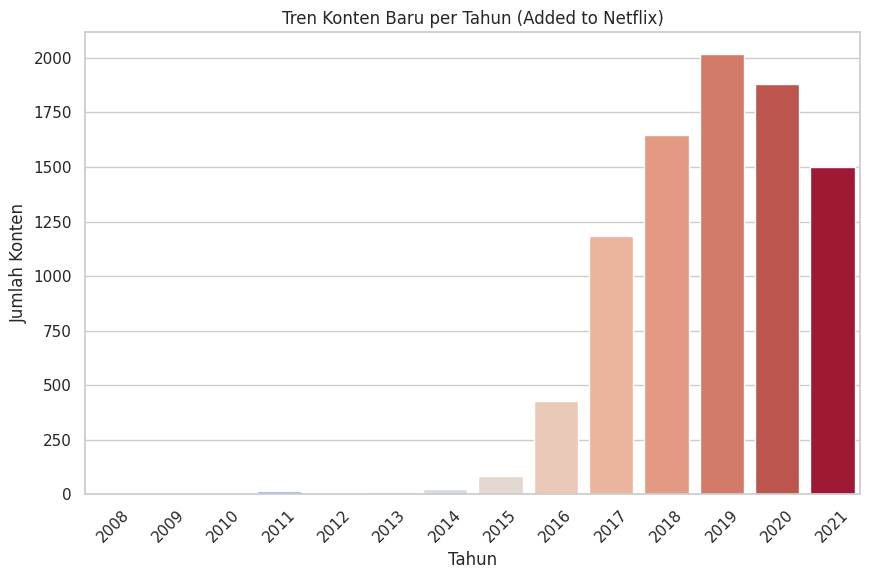

In [ ]:
df['year_added'] = df['date_added'].dt.year
sns.countplot(data=df, hue='year_added', x='year_added', palette='coolwarm', legend=False)
plt.title("Tren Konten Baru per Tahun (Added to Netflix)")
plt.xlabel("Tahun")
plt.ylabel("Jumlah Konten")
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index()

,count
year_added,
2008,2
2009,2
2010,1
2011,13
2012,3
2013,11
2014,24
2015,82
2016,426


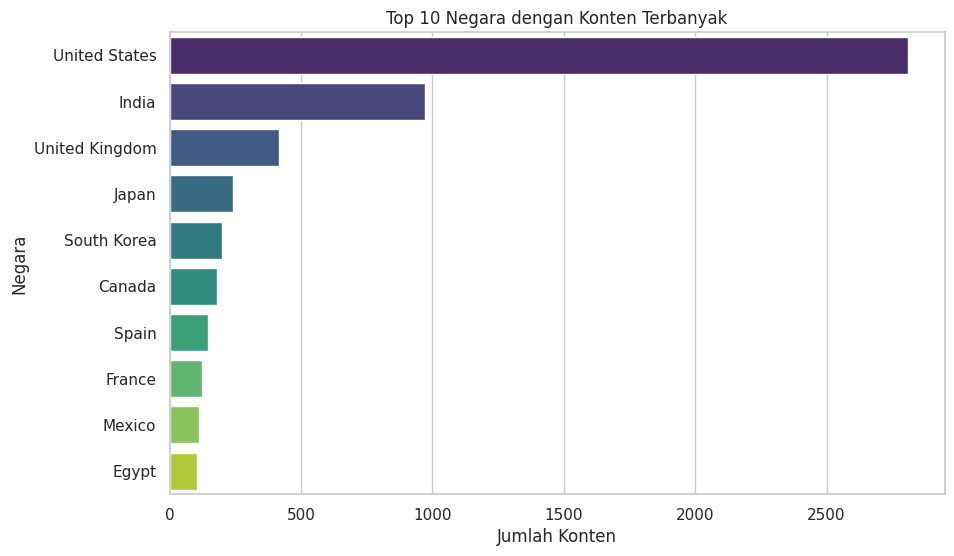

In [ ]:
top_countries = df[df['country'] != 'Unknown']['country'].value_counts().head(10).reset_index()
top_countries.columns = ['Negara', 'Jumlah Konten']

sns.barplot(data=top_countries, x='Jumlah Konten', y='Negara', hue='Negara', palette='viridis', legend=False)
plt.title("Top 10 Negara dengan Konten Terbanyak")
plt.xlabel("Jumlah Konten")
plt.ylabel("Negara")
plt.show()

In [ ]:
df[df['country'] != 'Unknown']['country'].value_counts().head(10)

,count
country,
United States,2809
India,972
United Kingdom,418
Japan,243
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


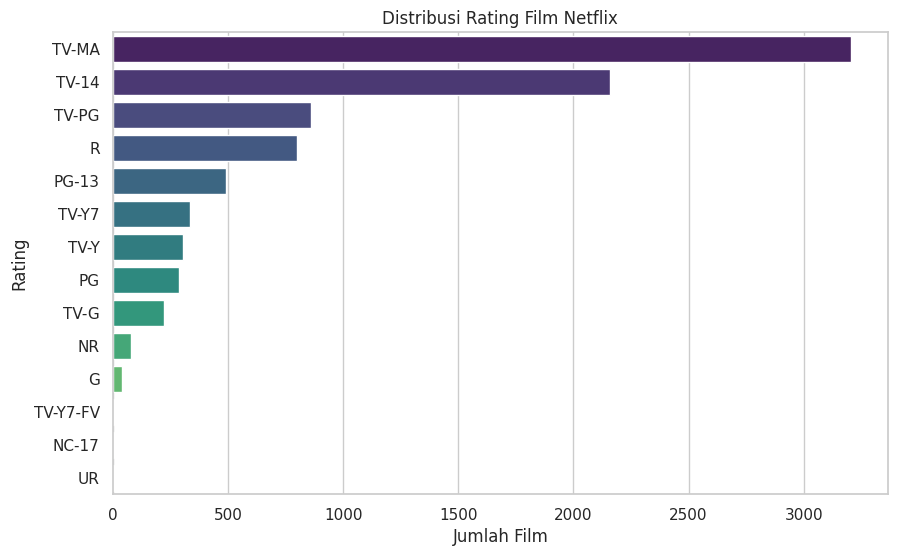

In [ ]:
rating_counts = df['rating'].value_counts().reset_index()
rating_counts.columns = ['Rating', 'Jumlah Film']

sns.barplot(data=rating_counts, x='Jumlah Film', y='Rating', hue='Rating', palette='viridis', legend=False)
plt.xlabel('Jumlah Film')
plt.ylabel('Rating')
plt.title('Distribusi Rating Film Netflix')
plt.show()

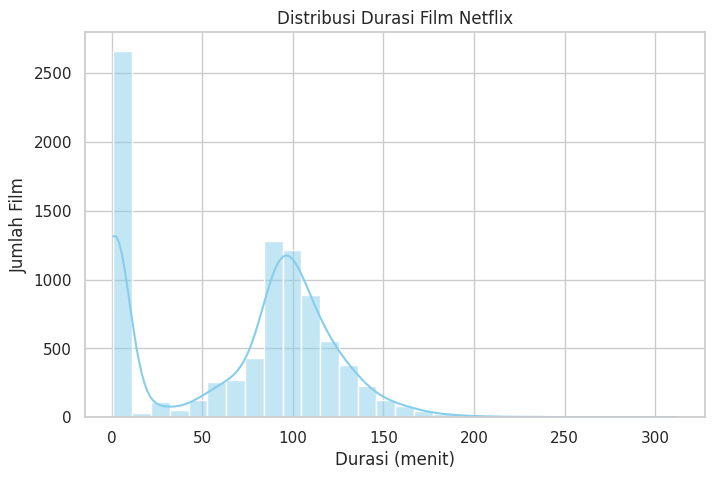

In [ ]:
df['duration_min'] = df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(8,5))
sns.histplot(df['duration_min'].dropna(), bins=30, kde=True, color='skyblue')
plt.xlabel('Durasi (menit)')
plt.ylabel('Jumlah Film')
plt.title('Distribusi Durasi Film Netflix')
plt.show()

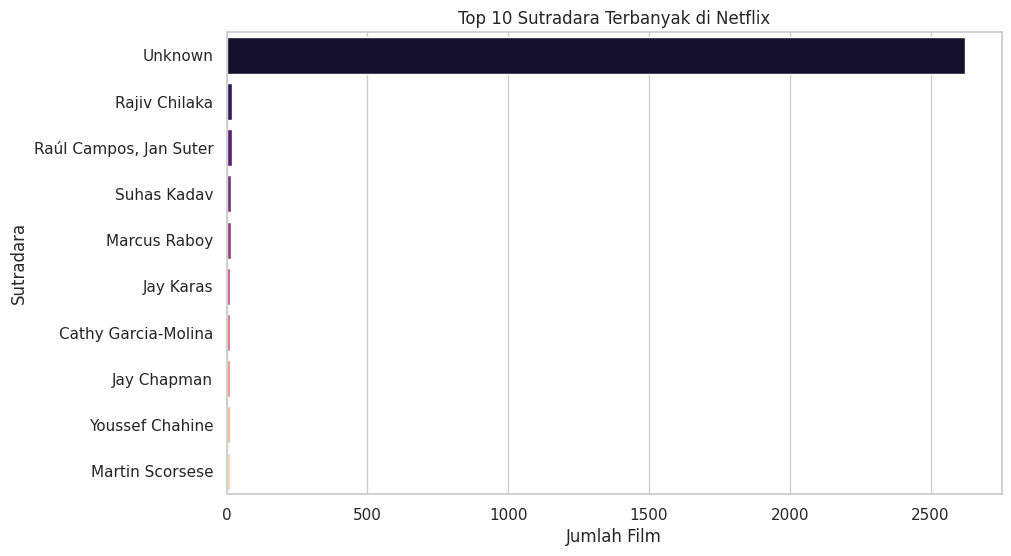

In [ ]:
top_directors = df['director'].value_counts().head(10).reset_index()
top_directors.columns = ['Sutradara', 'Jumlah Film']
sns.barplot(data=top_directors, x='Jumlah Film', y='Sutradara', hue='Sutradara', palette='magma', legend=False)
plt.xlabel('Jumlah Film')
plt.ylabel('Sutradara')
plt.title('Top 10 Sutradara Terbanyak di Netflix')
plt.show()



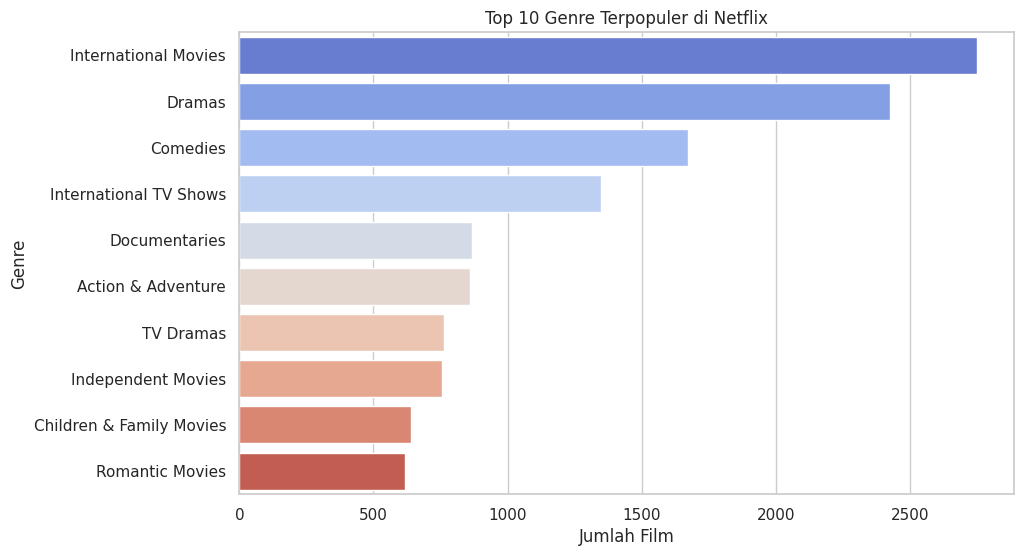

In [ ]:
genre_series = df['listed_in'].dropna().str.split(', ').explode()
genre_counts = genre_series.value_counts().head(10).reset_index()
genre_counts.columns = ['Genre', 'Jumlah Film']

sns.barplot(data=genre_counts, x='Jumlah Film', y='Genre', hue='Genre', palette='coolwarm', legend=False)
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
plt.title('Top 10 Genre Terpopuler di Netflix')
plt.show()

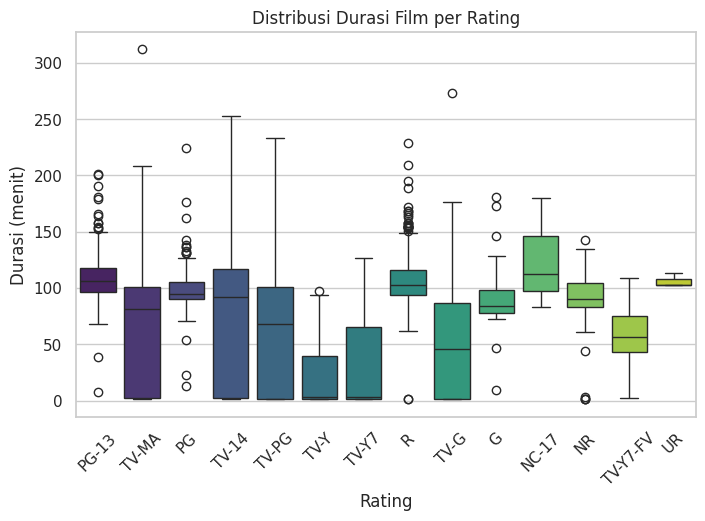

In [ ]:
film_df = df[df['duration_min'].notna()]

plt.figure(figsize=(8,5))
sns.boxplot(x='rating', y='duration_min', data=film_df, hue='rating', palette='viridis', legend=False)
plt.xlabel('Rating')
plt.ylabel('Durasi (menit)')
plt.title('Distribusi Durasi Film per Rating')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import plotly.express as px

fig = px.scatter(film_df, x='duration_min', y='rating',
                 size='duration_min', color='rating',
                 hover_data=['title', 'director'],
                 title='Interaktif: Durasi vs Rating Film Netflix')
fig.show()

# **INSIGHT**

Analisis dataset Netflix menunjukkan bahwa TV Show mendominasi katalog, meski film tetap hadir sebagai variasi. Jumlah konten baru meningkat setiap tahun, dengan produksi terfokus di Amerika Serikat, India, dan Inggris. Mayoritas konten ditujukan untuk penonton remaja hingga dewasa, dengan durasi film biasanya antara 60 sampai 120 menit. Beberapa sutradara menonjol karena kontribusi produksi yang konsisten, sementara genre populer seperti Drama, Comedy, dan Action & Adventure mendominasi pilihan penonton.

Pendalaman data mengungkapkan durasi film relatif seragam di setiap rating, meski film dewasa cenderung lebih panjang. Visualisasi interaktif memungkinkan eksplorasi durasi, rating, serta informasi judul dan sutradara, memudahkan identifikasi konten spesifik. Secara keseluruhan, Netflix berhasil menyeimbangkan variasi genre, durasi, dan rating untuk menjangkau berbagai segmen penonton, sekaligus mendukung strategi rekomendasi konten yang lebih personal dan efektif.